In [1]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical

import re

In [2]:
#importation des donnees
train = pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None,names=['ID','entity','sentiment','text'],index_col=False) 
validation = pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_validation.csv', header=None,names=['ID','entity','sentiment','text'],index_col=False)

In [3]:
train.head(5)

,ID,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
train.head(5)

,ID,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train.info(),validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   object
 3   text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


(None, None)

In [6]:
train.shape,validation.shape #jfjfjfj

((74682, 4), (1000, 4))

([<matplotlib.patches.Wedge at 0x7fa4a698cfd0>,
 [Text(0.6414093669225578, 0.8936408809046303, 'negative'),
  Text(-1.0260553442286633, 0.39649770564254155, 'positive'),
  Text(-0.31734499213929374, -1.0532293937999033, 'neutral'),
  Text(0.9398173765782871, -0.5716146417662045, 'irrelevant')])

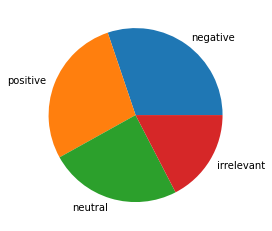

In [7]:
from matplotlib import pyplot as plt
lable=['negative','positive','neutral','irrelevant']
data=train.sentiment.value_counts()
plt.pie(data,labels=lable)

In [8]:
features=train.columns
for feature in features:
     print(f'{feature}--->{train[feature].nunique()}')

ID--->12447
entity--->32
sentiment--->4
text--->69491


In [9]:
print(train.columns)

Index(['ID', 'entity', 'sentiment', 'text'], dtype='object')


Reduce to only text and sentiment

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['sentiment'] = le.fit_transform(train['sentiment'])
validation['sentiment'] = le.fit_transform(validation['sentiment'])

In [11]:
new_train = train[['text','sentiment']]
new_validation = validation[['text','sentiment']]

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [13]:
import re
corpus=[]
for i in range(len(train)):
    s=re.sub('[^A-Za-z0-9 ]',' ',str(new_train['text'][i]))
    s=s.lower()
    s=s.split()
    s=[word for word in s if word not in stopwords.words('english')]
    s=' '.join(s)
    s=ps.stem(s)
    corpus.append(s)
    
#corpus    

In [14]:
corpus1=[]
for i in range(len(validation)):
    s=re.sub('[^A-Za-z0-9 ]',' ',new_validation['text'][i])
    s=s.lower()
    s=s.split()
    s=[word for word in s if word not in stopwords.words('english')]
    s=' '.join(s)
    s=ps.stem(s)
    corpus1.append(s)
    
#corpus1  

In [15]:
train_x=cv.fit_transform(corpus).toarray()
train_y=new_train['sentiment']

In [16]:
validation_x=cv.fit_transform(corpus1).toarray()
train_y=new_train['sentiment']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size = 0.15, random_state = 42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [20]:
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
model.score( X_test, y_test)

0.7608676247433723

In [22]:
y_predicted = model.predict(X_test)

In [23]:
y_predicted [:5]

array([1, 3, 1, 0, 3])

In [24]:
y_test[:5]

34877    0
21704    3
47008    1
7969     0
454      3
Name: sentiment, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1963
           1       0.73      0.85      0.79      3405
           2       0.81      0.66      0.73      2668
           3       0.73      0.81      0.77      3167

    accuracy                           0.76     11203
   macro avg       0.78      0.75      0.75     11203
weighted avg       0.77      0.76      0.76     11203



In [26]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1296,  287,  101,  279],
       [  66, 2904,  142,  293],
       [ 114,  432, 1752,  370],
       [  91,  343,  161, 2572]])

Text(69.0, 0.5, 'Truth')

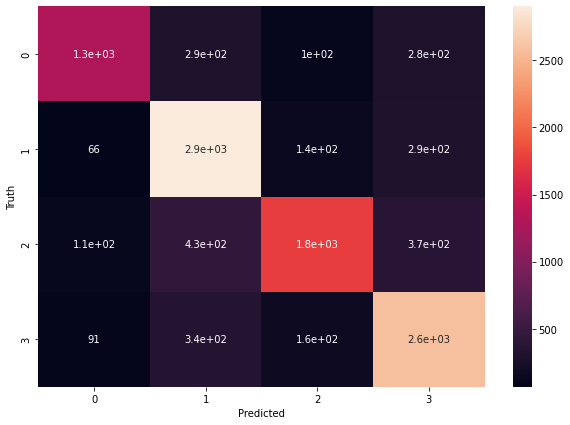

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x7fa4a6c17320>: 0.7312327055253057
